# Створення моделей
### **Метод RandomForestRegressor**
`RandomForestRegressor` — це алгоритм машинного навчання для задач регресії, який є ансамблевим методом. Він базується на методі випадкових лісів (**Random Forest**), що комбінує велику кількість рішень від різних дерев рішень (**Decision Trees**) для підвищення точності та зменшення ризику перенавчання.

#### **Основні особливості:**
- **Ансамбль дерев:** складається з декількох дерев рішень, кожне з яких навчається на випадковій вибірці даних.
- **Бутстреп (Bootstrap):** кожне дерево навчається на випадковій підмножині вибірки (метод підвибірки зі заміною).
- **Випадковість розщеплень:** при кожному розщепленні вузла вибирається випадкова підмножина ознак (features).
- **Усереднення прогнозів:** остаточний прогноз отримується шляхом усереднення прогнозів всіх дерев (на відміну від класифікації, де використовується голосування).

#### **Переваги:**
✔️ Менше схильний до перенавчання, ніж окремі дерева рішень  
✔️ Стійкий до викидів та нерелевантних ознак  
✔️ Вміє працювати з нелінійними залежностями  

In [61]:
%pip install pandas
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [62]:
db = load_diabetes()
X = np.array(db.data)
y = np.array(db.target)
print(f"Data shape: X={X.shape} y={y.shape}")

Data shape: X=(442, 10) y=(442,)


In [63]:
# ЕКСПЕРИМЕНТ 1: Масштабуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# ЕКСПЕРИМЕНТ 2: Вибір лише перших 5 ознак
X_small = X_scaled

In [65]:

# ЕКСПЕРИМЕНТ 3: Трансформуємо ціль (наприклад, логарифм)
y_transformed = np.log1p(y)  # log(1 + y)
X_train, X_test, y_train, y_test = train_test_split(X_small, y_transformed, test_size=0.2, random_state=42)

In [66]:
db = load_diabetes()
X = np.array(db.data)
y = np.array(db.target)
print(f"Data shape: X={X.shape} y={y.shape}")
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

Data shape: X=(442, 10) y=(442,)


In [67]:
# Зміна параметрів моделі для експерименту
n_estimators = 50
max_depth = 4
max_features = 2

# Створення та навчання моделі
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=0)
rf.fit(X_train, y_train)

# Прогноз
predictions = rf.predict(X_test)

# Зворотна трансформація цільової змінної
predictions_exp = np.expm1(predictions)
y_test_exp = np.expm1(y_test)

In [68]:
# Оцінюємо точність
mse = mean_squared_error(y_test_exp, predictions_exp)
r2 = r2_score(y_test_exp, predictions_exp)

print(f"Середньоквадратична помилка (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")
print("Макс y_train:", np.max(y_train))
print("Макс y_train (expm1):", np.max(np.expm1(y_train)))


Середньоквадратична помилка (MSE): 3736.19
R²: 0.42
Макс y_train: 5.849324779946859
Макс y_train (expm1): 346.00000000000006


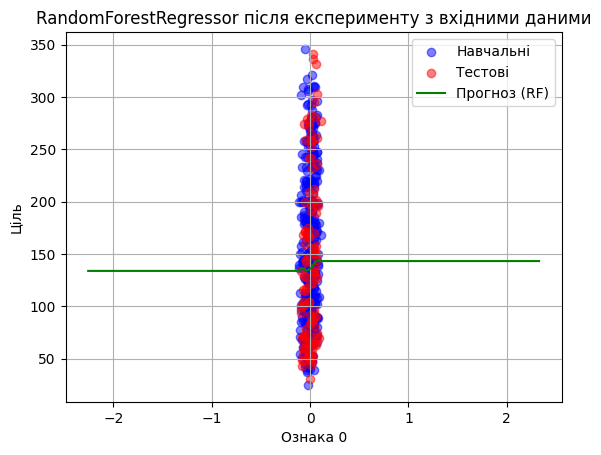

In [69]:
# Побудова сітки по одній ознаці (наприклад, f = 0)
f = 0
X_grid = np.linspace(np.min(X_small[:, f]), np.max(X_small[:, f]), 100).reshape(-1, 1)
X_grid_full = np.tile(np.mean(X_small, axis=0), (100, 1))
X_grid_full[:, f] = X_grid.flatten()

y_grid_pred = rf.predict(X_grid_full)
y_grid_pred_exp = np.expm1(y_grid_pred)

plt.scatter(X_train[:, f], np.expm1(y_train), label="Навчальні", color="blue", alpha=0.5)
plt.scatter(X_test[:, f], y_test_exp, label="Тестові", color="red", alpha=0.5)
plt.plot(X_grid, y_grid_pred_exp, label="Прогноз (RF)", color="green")

plt.xlabel(f"Ознака {f}")
plt.ylabel("Ціль")
plt.title("RandomForestRegressor після експерименту з вхідними даними")
plt.legend()
plt.grid(True)
plt.show()
